In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statistics

In [2]:
def model_ols(y, x):
    x = sm.add_constant(x)
    model = sm.OLS(y, x).fit()
    return model

def show(data, y_symbol, x_symbol):
    y = data[y_symbol]
    x = data[x_symbol]
    
    model=model_ols(y, x)
    std = statistics.stdev(model.resid)
    entry_threshold = 2 # entrada em 2 desvio padrão

    #plt.figure(figsize=(15,6))
    plt.figure(figsize=(10,5))
    plt.plot(model.resid)
    plt.ylabel('Residual')
    plt.title(y_symbol + ' / ' + x_symbol)

    plt.axhline(0, color='black',label='mean',linestyle='--') # Add the mean of residual
    plt.axhline(entry_threshold*std, color='green', linestyle='--',label='trade')
    plt.axhline(-entry_threshold*std, color='green', linestyle='--')

    plt.legend()
    plt.show()

In [12]:
pairs = pd.read_csv('datasets/cointegrated_pairs.csv', index_col=0)
data = pd.read_csv('datasets/data.csv', index_col=0)
pairs.shape, data.shape

((5077, 10), (340, 202))

In [16]:
df_hurst = pairs.loc[(pairs['Hurst'] > 0) & (pairs['Hurst'] < 0.4)]

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


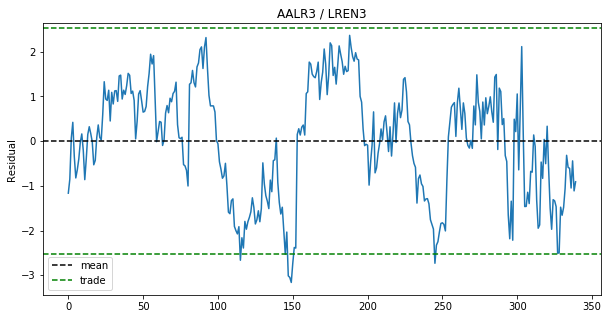

In [13]:
show(data, 'AALR3', 'LREN3')

In [22]:
corr = df_hurst.loc[(df_hurst['Corr'] >= 0.95)]
corr

,Dependente,Independente,pValue,ADFStatistic,Beta,HalfLife,Hurst,Corr,Signal,SignalPerc
291,AZUL4,OFSA3,0.012894,-3.347249,1.991538,10,0.398321,0.950523,LS,1.195363
320,BBAS3,EMBR3,0.000573,-4.235583,2.062191,7,0.355488,0.953800,SL,0.653096
333,BBDC3,ITSA3,0.002969,-3.794054,3.970428,7,0.357379,0.956756,LS,0.212126
335,BBDC3,SHOW3,0.000090,-4.684700,3.556306,6,0.320268,0.958413,LS,0.221680
339,BBDC4,ITSA3,0.005535,-3.612012,4.494996,8,0.349274,0.951095,LS,0.187105
...,...,...,...,...,...,...,...,...,...,...
4608,UNIP3,UNIP6,0.001133,-4.058649,0.747065,4,0.221695,0.957799,LS,0.327294
4622,UNIP6,UNIP3,0.001666,-3.954837,1.227977,5,0.196726,0.957799,SL,0.035180
4652,USIM5,MYPK3,0.000142,-4.577994,0.451850,6,0.261439,0.956389,LS,0.139468
5035,WIZS3,DIRR3,0.000016,-5.077608,0.857739,5,0.287171,0.961688,LS,0.590484


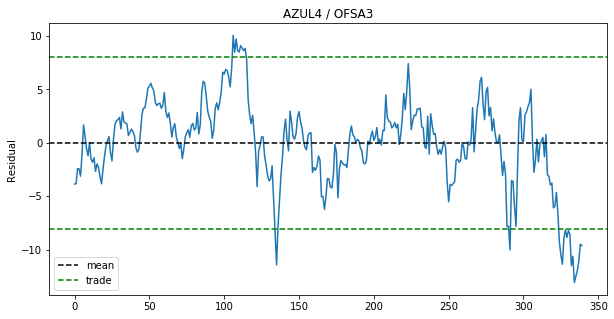

In [23]:
show(data, 'AZUL4', 'OFSA3')

In [24]:
corr.loc[(df_hurst['SignalPerc'] >= 0.9)]

,Dependente,Independente,pValue,ADFStatistic,Beta,HalfLife,Hurst,Corr,Signal,SignalPerc
291,AZUL4,OFSA3,0.012894,-3.347249,1.991538,10,0.398321,0.950523,LS,1.195363
709,BRPR3,EZTC3,0.009435,-3.447738,0.220221,10,0.365591,0.958488,LS,1.015265
711,BRPR3,HBOR3,0.008088,-3.496094,2.085382,9,0.382906,0.965058,LS,1.103252
1036,CSAN3,JHSF3,0.003327,-3.761456,5.807974,7,0.341890,0.966090,SL,0.989967
1128,DIRR3,ENGI11,0.000065,-4.758101,0.466708,5,0.361587,0.957258,LS,0.937684
1350,EMBR3,BBAS3,0.000545,-4.248483,0.441150,7,0.351602,0.953800,LS,1.101790
1783,EVEN3,LOGG3,0.011586,-3.382067,0.706407,9,0.263213,0.952988,LS,1.546002
1801,EZTC3,LOGG3,0.001045,-4.080048,2.000709,7,0.284210,0.953964,LS,0.966034
1832,FLRY3,LOGG3,0.001931,-3.914474,0.735635,6,0.284096,0.952360,LS,1.234709
2091,GNDI3,QUAL3,0.024081,-3.134831,1.439638,9,0.309196,0.968293,SL,1.936701


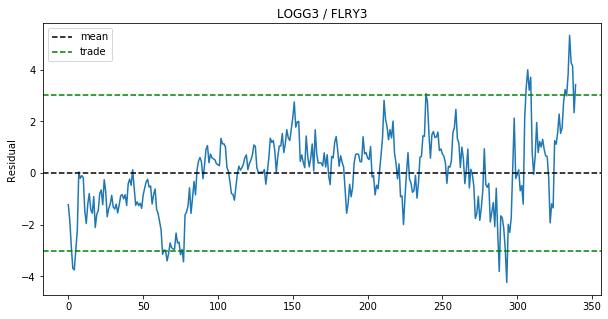

In [31]:
show(data, 'LOGG3', 'FLRY3')

In [30]:
data['OFSA3']

0      33.99
1      34.00
2      33.23
3      32.76
4      32.81
       ...  
335    26.69
336    26.10
337    25.53
338    24.40
339    24.20
Name: OFSA3, Length: 340, dtype: float64